In [3]:
from osgeo import gdal
raster = gdal.Open(r'C:\Users\mhardika\Downloads\nlcd_2019_land_cover_l48_20210604\nlcd_2019_land_cover_l48_20210604.img')

ImportError: cannot import name 'gdal' from 'osgeo' (unknown location)

In [4]:
import os
from osgeo import gdal,ogr,osr,gdalnumeric
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp

<AxesSubplot: >

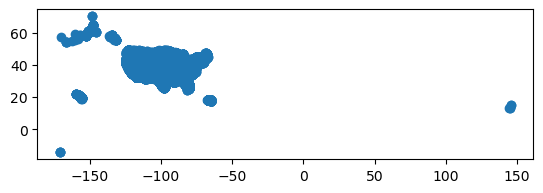

In [24]:
df = gp.read_file('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/Water Source Data/Industrial/General_Manufacturing_Facilities/General_Manufacturing_Facilities.shp')
df = df.to_crs("EPSG:4326")
fig, ax = plt.subplots()
df.plot(ax=ax,figsize=(50, 50))

In [25]:
df1 = df[df['STATE']=='TX']
df1.head()

,OBJECTID,UNIQUE_ID,NAME,PHONE,FAX,ADDRESS,ADDRESS2,CITY,STATE,ZIP,...,SIC2,SIC3,SIC4,NAICS,NAICSDESCR,WEB,LONGITUDE,LATITUDE,GlobalID,geometry
29004,29005,N/A,COBRA COATING CO.,(432) 332-0272,(432) 332-0283,2300 EAST MURPHY STREET,NOT AVAILABLE,ODESSA,TX,79761,...,3471,N/A,N/A,332813,"ELECTROPLATING, PLATING, POLISHING, ANODIZING ...",NOT AVAILABLE,-102.335895,31.847813,343082ff-37e4-4068-a4cb-46155ae14120,POINT (-102.33589 31.84781)
29005,29006,N/A,CRYSTIN MFG. CO.,(432) 366-6689,(432) 366-6663,505 WEST HILLMONT ROAD,NOT AVAILABLE,ODESSA,TX,79764,...,N/A,N/A,N/A,332911,INDUSTRIAL VALVE MANUFACTURING,NOT AVAILABLE,-102.408512,31.927711,bdd4e097-df5c-4aec-85a0-90f74194e92b,POINT (-102.40851 31.92771)
29006,29007,N/A,"ALLIED EQUIPMENT, INC.",(432) 367-6000,(432) 367-3939,8000 NORTH GOLDER AVENUE,NOT AVAILABLE,ODESSA,TX,79764,...,N/A,N/A,N/A,332410,POWER BOILER AND HEAT EXCHANGER MANUFACTURING,WWW.ALLIEDEQ.COM,-102.406067,31.922742,9666858b-0ef9-4754-9c41-b8c0ad15e124,POINT (-102.40607 31.92274)
29007,29008,N/A,"ARC & FLAME, INC.",(432) 362-3318,(432) 362-3466,8700 NORTH COUNTY ROAD WEST,NOT AVAILABLE,ODESSA,TX,79764,...,N/A,N/A,N/A,333912,AIR AND GAS COMPRESSOR MANUFACTURING,NOT AVAILABLE,-102.417610,31.931015,d1694a97-485a-42ce-8531-6086a9b1ed63,POINT (-102.41761 31.93101)
29008,29009,N/A,"ARCHITECTURAL PRODUCTS CO., INC.",(915) 584-9424,(915) 833-7587,4737 OSBORNE DRIVE,NOT AVAILABLE,EL PASO,TX,79922,...,N/A,N/A,N/A,332323,ORNAMENTAL AND ARCHITECTURAL METAL WORK MANUFA...,WWW.APCOINC.NET,-106.571888,31.835684,5b469082-b4cd-4dbe-ab93-f1dcfbb39940,POINT (-106.57189 31.83568)


In [29]:
df1.columns

Index(['OBJECTID', 'UNIQUE_ID', 'NAME', 'PHONE', 'FAX', 'ADDRESS', 'ADDRESS2',
       'CITY', 'STATE', 'ZIP', 'ZIP4', 'COUNTY', 'FIPS', 'MADDRESS', 'MCITY',
       'MSTATE', 'MZIP', 'MZIP4', 'DIRECTIONS', 'GEOPREC', 'EMP', 'PRODUCT',
       'SIC', 'SIC2', 'SIC3', 'SIC4', 'NAICS', 'NAICSDESCR', 'WEB',
       'LONGITUDE', 'LATITUDE', 'GlobalID', 'geometry'],
      dtype='object')

In [44]:
texas_na = df1[df1['NAICS']=='N/A'].geometry
texas_ind = df1[df1['NAICS']!='N/A'].geometry

In [47]:
print(len(texas_na))
print(len(texas_ind))

1222
8966


<AxesSubplot: >

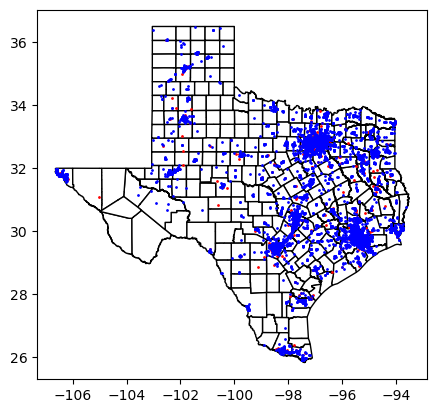

In [45]:
texas = gp.read_file('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/GeoData/Texas Counties Map/geo_export_c05b3355-1638-4e46-b56c-ac18de751ed8.shp')
texas = texas.to_crs("EPSG:4326")
fig, ax = plt.subplots()
texas.geometry.plot(ax=ax,figsize=(50, 50),color = 'white',edgecolor ='black')
texas_na.plot(ax=ax,figsize=(50, 50),markersize=1,color='red')
texas_ind.plot(ax=ax,figsize=(50, 50),markersize=1,color='blue')

In [38]:
df1['NAICS'].astype(str).str[:3].unique()


array(['332', '333', 'N/A', '311', '336', '321', '337', '327', '323',
       '325', '339', '324', '335', '316', '334', '315', '313', '326',
       '314', '322', '331', '312', '113'], dtype=object)

In [20]:
clip = gp.read_file('/Users/mhardika/Downloads/clipped/clip_zip_ship.gdb/',layer ='clipped')

In [22]:
clip.geometry.to_crs("EPSG:4326")

0    MULTIPOLYGON (((-116.20097 30.52660, -116.2009...
Name: geometry, dtype: geometry

<AxesSubplot: >

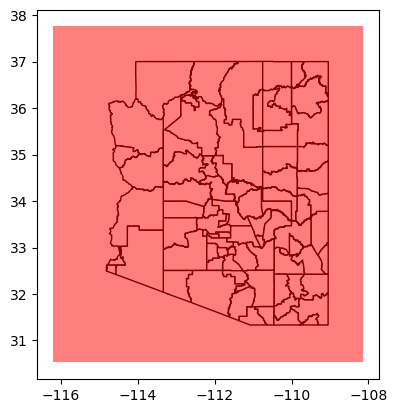

In [7]:
fig, ax = plt.subplots()
# az.plot(ax=ax,figsize=(50, 50),color = 'white',edgecolor ='black')
az = gp.read_file('/Users/mhardika/Downloads/tl_2016_04_cousub/tl_2016_04_cousub.shp')
az = az.to_crs("EPSG:4326")
az.plot(ax=ax,figsize=(50, 50),color = 'white',edgecolor ='black')
clip = clip.to_crs('EPSG:4326')
clip.plot(ax=ax,color='red', alpha=.5)

In [1]:
ds = gdal.Open('/Users/mhardika/Downloads/az_ag/clipped.TIF')
ds

NameError: name 'gdal' is not defined

In [7]:
ds.RasterCount

1

In [8]:
srcband = ds.GetRasterBand(1)


In [32]:
srcband

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000002053D9754B0> >

In [9]:
srcband.ReadAsArray()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [10]:
proj = ds.GetProjection()

In [11]:
shp_proj = osr.SpatialReference()

In [12]:
shp_proj.ImportFromWkt(proj)

0

In [13]:
call_drive = ogr.GetDriverByName('ESRI Shapefile')

In [14]:
create_shp = call_drive.CreateDataSource('az_ag_output_shapefile.shp')

In [15]:
shp_layer = create_shp.CreateLayer('layername',srs=shp_proj)

In [16]:
new_field = ogr.FieldDefn(str('ID'),ogr.OFTInteger)

In [17]:
shp_layer.CreateField(new_field)

0

In [18]:
gdal.Polygonize(srcband,None,shp_layer,0,[],callback = None)
create_shp.Destroy()
ds = None

In [2]:
maricopa = gp.read_file('az_select_output_shapefile.shp')

In [3]:
maricopa_4326 = maricopa.to_crs("EPSG:4326")

In [6]:
maricopa_4326_id = maricopa_4326.set_index('ID')
maricopa_4326_id.head()

,geometry
ID,
74,"POLYGON ((-110.81351 37.00261, -110.81297 37.0..."
74,"POLYGON ((-110.81297 37.00239, -110.81270 37.0..."
74,"POLYGON ((-110.84531 37.00218, -110.84504 37.0..."
74,"POLYGON ((-110.81270 37.00218, -110.81243 37.0..."
74,"POLYGON ((-110.95392 37.00196, -110.95365 37.0..."


In [16]:
maricopa_4326_include = maricopa_4326_id.drop(255)

In [39]:
maricopa_4326_include.iloc[74]

geometry    POLYGON ((-110.82483 36.97097, -110.82456 36.9...
Name: 74, dtype: geometry

In [34]:
maricopa_4326_centroid = gp.GeoSeries(maricopa_4326_include.geometry.values.centroid.to_crs("EPSG:4326"))
maricopa_4326_centroid

c:\Users\mhardika\miniconda3\envs\watertap3\lib\site-packages\IPython\core\interactiveshell.py:3382: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if await self.run_code(code, result, async_=asy):


0         POINT (-110.81324 37.00250)
1         POINT (-110.81283 37.00229)
2         POINT (-110.84517 37.00196)
3         POINT (-110.81257 37.00207)
4         POINT (-110.95378 37.00186)
                     ...             
268775    POINT (-111.00067 31.33349)
268776    POINT (-110.95836 31.33326)
268777    POINT (-109.08834 31.33326)
268778    POINT (-110.99825 31.33303)
268779    POINT (-110.99825 31.33280)
Length: 268780, dtype: geometry

<AxesSubplot: >

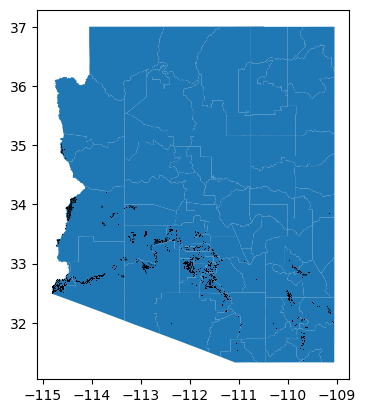

In [40]:
df = gp.read_file('/Users/mhardika/Downloads/tl_2016_04_cousub/tl_2016_04_cousub.shp')
df = df.to_crs("EPSG:4326")
fig, ax = plt.subplots()
df.plot(ax=ax,figsize=(50, 50))
maricopa_4326_include.plot(ax=ax, color='black', markersize = 8)

<AxesSubplot: >

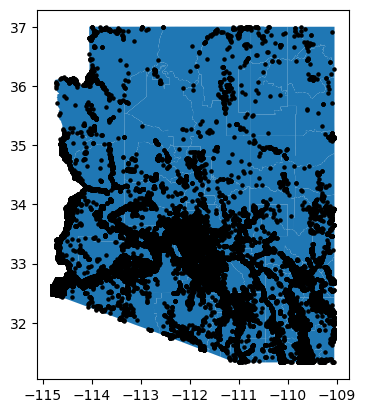

In [27]:
df = gp.read_file('/Users/mhardika/Downloads/tl_2016_04_cousub/tl_2016_04_cousub.shp')
df = df.to_crs("EPSG:4326")
fig, ax = plt.subplots()
df.plot(ax=ax,figsize=(50, 50))
maricopa_4326_centroid.plot(ax=ax, color='black', markersize = 5)